# Usage (quick version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import warnings

In [3]:
import covsirphy as cs
cs.__version__

'2.8.3'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/


Detailed citaition list:

Open Government Data, United Kingdom (2020), https://coronavirus.data.gov.uk
Department of Disease Control of Thailand (2020), https://covid19.th-stat.com/
World Health Organization (2020), https://covid19.who.int
Ireland Health Protection Surveillance Centre (HPSC) and Health Service Executive (HSE) (2020), https://covid19ireland-geohive.hub.arcgis.com/
The COVID Tracking Project (2020), https://covidtracking.com
Ministry of Health of Croatia (2020), https://data.gov.hr/dataset/koronavirus/resource/08fab529-ebba-46c7-be79-05782ddb02ef
Open Government Data, Latvia (2020), https://data.gov.lv/dati/dataset
Taiwan Ministry of Health and Welfare (2020), https://data.gov.tw/dataset/120451
Wikipedia (2020), https://en.wikipedia.org/wiki
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be
Johns Hopkins Center for Systems Science and Engineering (2020), https://github.com/CSSEGISandData/COVID-19
Covid19data.com.au (2020), https://github.com/M3IT/COVID-19_Data
Data Science

### The number of cases (JHU style)

In [5]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [6]:
print(data_loader.covid19dh_citation)

Open Government Data, United Kingdom (2020), https://coronavirus.data.gov.uk
Department of Disease Control of Thailand (2020), https://covid19.th-stat.com/
World Health Organization (2020), https://covid19.who.int
Ireland Health Protection Surveillance Centre (HPSC) and Health Service Executive (HSE) (2020), https://covid19ireland-geohive.hub.arcgis.com/
The COVID Tracking Project (2020), https://covidtracking.com
Ministry of Health of Croatia (2020), https://data.gov.hr/dataset/koronavirus/resource/08fab529-ebba-46c7-be79-05782ddb02ef
Open Government Data, Latvia (2020), https://data.gov.lv/dati/dataset
Taiwan Ministry of Health and Welfare (2020), https://data.gov.tw/dataset/120451
Wikipedia (2020), https://en.wikipedia.org/wiki
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be
Johns Hopkins Center for Systems Science and Engineering (2020), https://github.com/CSSEGISandData/COVID-19
Covid19data.com.au (2020), https://github.com/M3IT/COVID-19_Data
Data Science

In [7]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
271609,2020-09-29,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
271610,2020-09-30,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
271611,2020-10-01,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
271612,2020-10-02,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
271613,2020-10-03,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04


In [8]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
271609,2020-09-29,Colombia,Vichada,14,0,0,14
271610,2020-09-30,Colombia,Vichada,14,0,0,14
271611,2020-10-01,Colombia,Vichada,14,0,0,14
271612,2020-10-02,Colombia,Vichada,14,0,0,14
271613,2020-10-03,Colombia,Vichada,14,0,0,14


In [9]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
194,2020-09-29,25547,2361,407,22779
195,2020-09-30,25741,2377,408,22956
196,2020-10-01,25973,2417,409,23147
197,2020-10-02,26169,2330,409,23430
198,2020-10-03,26376,2535,411,23430


In [10]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-09-29,33321202,9263788,1002122,23055292,0.015037,0.345955,0.041655
2020-09-30,33642269,9340073,1008333,23293863,0.014986,0.346199,0.041491
2020-10-01,33952761,9437666,1016872,23498223,0.014975,0.346043,0.041479
2020-10-02,34232034,9547158,1021498,23663378,0.014920,0.345632,0.041382
2020-10-03,34232715,9624168,1021504,23587043,0.014920,0.344510,0.041510


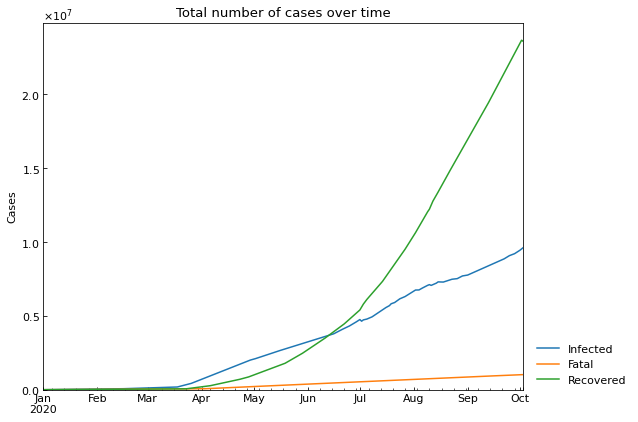

In [11]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [12]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
233,2020-09-29,83027,6022,1567,75438
234,2020-09-30,83604,6032,1574,75998
235,2020-10-01,84236,6087,1582,76567
236,2020-10-02,84778,5989,1593,77196
237,2020-10-03,85355,83756,1599,76155


In [13]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

In [14]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
231,2020-09-29,82494,5478,1557,75459
232,2020-09-30,83010,5421,1564,76025
233,2020-10-01,83563,5402,1571,76590
234,2020-10-02,84215,5418,1578,77219
235,2020-10-03,84768,5371,1590,77807


### Population in each country

In [15]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [16]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
271609,2020-09-29,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
271610,2020-09-30,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
271611,2020-10-01,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
271612,2020-10-02,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
271613,2020-10-03,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04


In [17]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
231975,COL,Colombia,Vichada,2020-09-29,107808
231976,COL,Colombia,Vichada,2020-09-30,107808
231977,COL,Colombia,Vichada,2020-10-01,107808
231978,COL,Colombia,Vichada,2020-10-02,107808
231979,COL,Colombia,Vichada,2020-10-03,107808


In [18]:
population_data.value("Japan", province=None)

126529100

In [19]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)

In [20]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [21]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
271609,2020-09-29,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
271610,2020-09-30,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
271611,2020-10-01,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
271612,2020-10-02,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
271613,2020-10-03,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04


In [22]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
271609,2020-09-29,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
271610,2020-09-30,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
271611,2020-10-01,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
271612,2020-10-02,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
271613,2020-10-03,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04


In [23]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
272,2020-09-29,1,1,1,0,0,1,1,3,2,2,1,37.04
273,2020-09-30,1,1,1,0,0,1,1,3,2,2,1,37.04
274,2020-10-01,1,1,1,0,0,1,1,3,2,2,1,37.04
275,2020-10-02,1,1,1,0,0,1,1,3,2,2,1,37.04
276,2020-10-03,1,1,1,0,0,1,1,3,2,2,1,37.04


In [24]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
272,2020-09-29,1,1,1,0,0,1,1,3,2,2,1,37.04
273,2020-09-30,1,1,1,0,0,1,1,3,2,2,1,37.04
274,2020-10-01,1,1,1,0,0,1,1,3,2,2,1,37.04
275,2020-10-02,1,1,1,0,0,1,1,3,2,2,1,37.04
276,2020-10-03,1,1,1,0,0,1,1,3,2,2,1,37.04


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [25]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

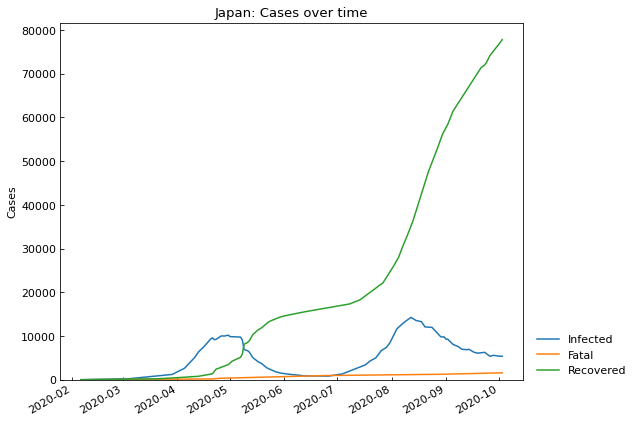

,Date,Confirmed,Infected,Fatal,Recovered
231,2020-09-29,82494,5478,1557,75459
232,2020-09-30,83010,5421,1564,76025
233,2020-10-01,83563,5402,1571,76590
234,2020-10-02,84215,5418,1578,77219
235,2020-10-03,84768,5371,1590,77807


In [26]:
import matplotlib
warnings.simplefilter("ignore", category=matplotlib.MatplotlibDeprecationWarning)
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

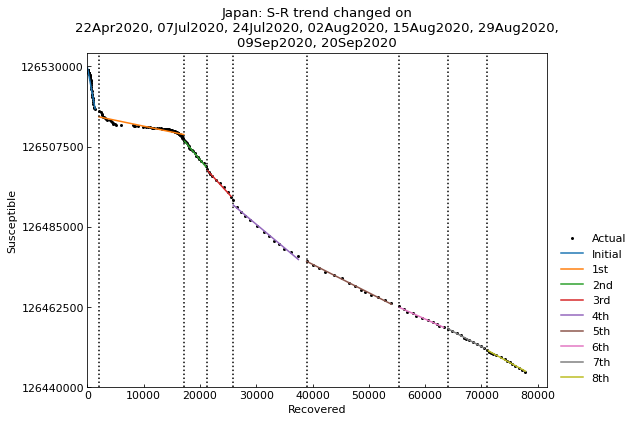

,Type,Start,End,Population
0th,Past,06Feb2020,21Apr2020,126529100
1st,Past,22Apr2020,06Jul2020,126529100
2nd,Past,07Jul2020,23Jul2020,126529100
3rd,Past,24Jul2020,01Aug2020,126529100
4th,Past,02Aug2020,14Aug2020,126529100
5th,Past,15Aug2020,28Aug2020,126529100
6th,Past,29Aug2020,08Sep2020,126529100
7th,Past,09Sep2020,19Sep2020,126529100
8th,Past,20Sep2020,03Oct2020,126529100


In [27]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [28]:
scenario.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	8th phase (20Sep2020 - 03Oct2020): finished 1731 trials in 1 min  0 sec

	2nd phase (07Jul2020 - 23Jul2020): finished  259 trials in 0 min  5 sec

	3rd phase (24Jul2020 - 01Aug2020): finished 1041 trials in 0 min 25 sec

	5th phase (15Aug2020 - 28Aug2020): finished  667 trials in 0 min 15 sec

	6th phase (29Aug2020 - 08Sep2020): finished  251 trials in 0 min  5 sec

	7th phase (09Sep2020 - 19Sep2020): finished  249 trials in 0 min  5 sec

	1st phase (22Apr2020 - 06Jul2020): finished 1926 trials in 1 min  0 sec

	0th phase (06Feb2020 - 21Apr2020): finished 1941 trials in 1 min  0 sec

	4th phase (02Aug2020 - 14Aug2020): finished 1976 trials in 1 min  0 sec

Completed optimization. Total: 2 min  6 sec

In [29]:
scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/gamma [day],1/alpha2 [day],alpha1 [-],1/beta [day],RMSLE,Trials,Runtime
0th,Past,06Feb2020,21Apr2020,126529100,SIR-F,4.66,0.018341,0.000174,0.104200,0.021769,1440,45,5760,0.018,9,0.937856,1941,1 min 0 sec
1st,Past,22Apr2020,06Jul2020,126529100,SIR-F,0.41,0.094355,0.000373,0.030364,0.067402,1440,14,2681,0.094,32,0.890362,1926,1 min 0 sec
2nd,Past,07Jul2020,23Jul2020,126529100,SIR-F,1.93,0.000466,0.000080,0.133382,0.068954,1440,14,12426,0.000,7,0.031898,259,0 min 5 sec
3rd,Past,24Jul2020,01Aug2020,126529100,SIR-F,1.84,0.000726,0.000120,0.134241,0.072807,1440,13,8341,0.001,7,0.019265,1041,0 min 25 sec
4th,Past,02Aug2020,14Aug2020,126529100,SIR-F,1.58,0.000627,0.000316,0.103524,0.064959,1440,15,3163,0.001,9,0.061572,1976,1 min 0 sec
5th,Past,15Aug2020,28Aug2020,126529100,SIR-F,0.82,0.000562,0.000900,0.078347,0.094316,1440,10,1111,0.001,12,0.021244,667,0 min 15 sec
6th,Past,29Aug2020,08Sep2020,126529100,SIR-F,0.71,0.020188,0.000164,0.062044,0.085037,1440,11,6106,0.020,16,0.016830,251,0 min 5 sec
7th,Past,09Sep2020,19Sep2020,126529100,SIR-F,0.78,0.002932,0.001325,0.079328,0.099966,1440,10,754,0.003,12,0.028250,249,0 min 5 sec
8th,Past,20Sep2020,03Oct2020,126529100,SIR-F,0.87,0.000464,0.000984,0.079341,0.090479,1440,11,1015,0.000,12,0.027419,1731,1 min 0 sec


### Accuracy of estimation

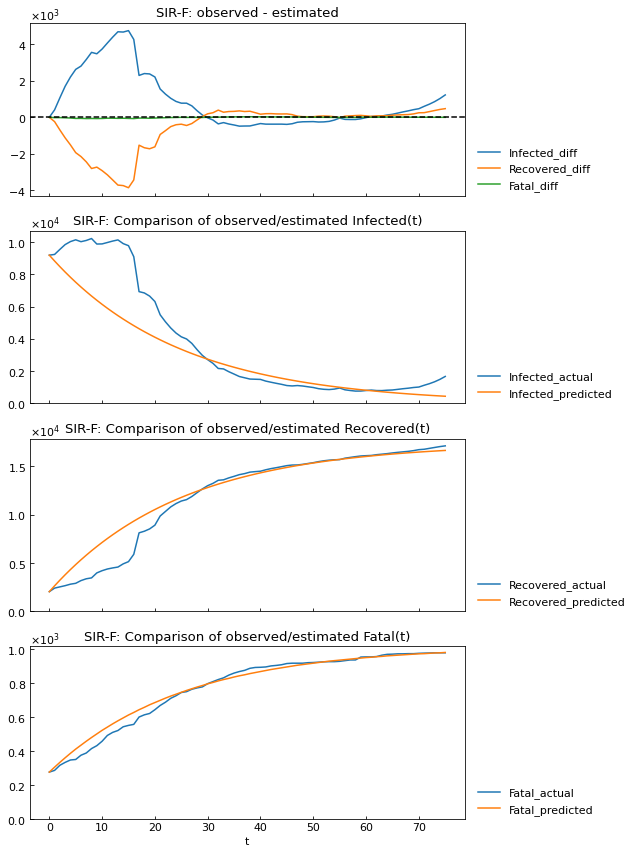

In [30]:
scenario.estimate_accuracy(phase="1st")

### Get parameter value

In [31]:
scenario.get("Rt", phase="4th")

1.58

### Show parameter history

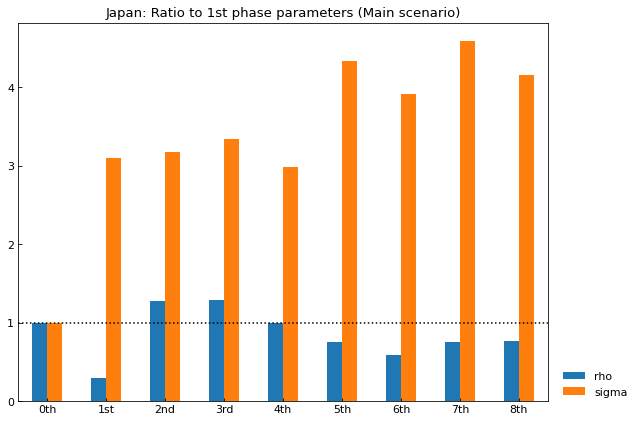

,0th,1st,2nd,3rd,4th,5th,6th,7th,8th
rho,1.0,0.291405,1.280058,1.288302,0.993514,0.751896,0.595434,0.761304,0.761428
sigma,1.0,3.096271,3.167561,3.344587,2.984045,4.332645,3.906381,4.592186,4.156375


In [32]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

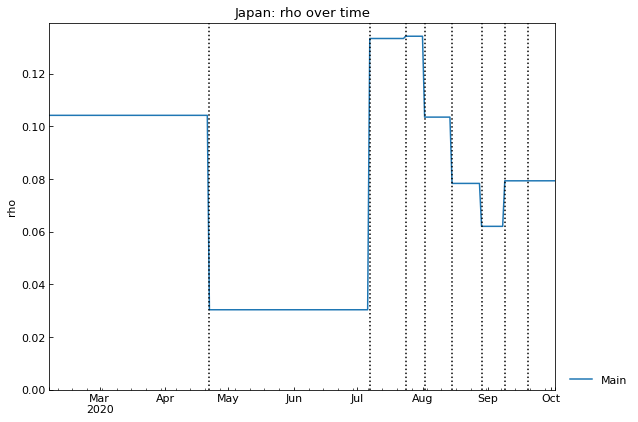

In [33]:
# version >= 2.8.0
_ = scenario.history(target="rho")

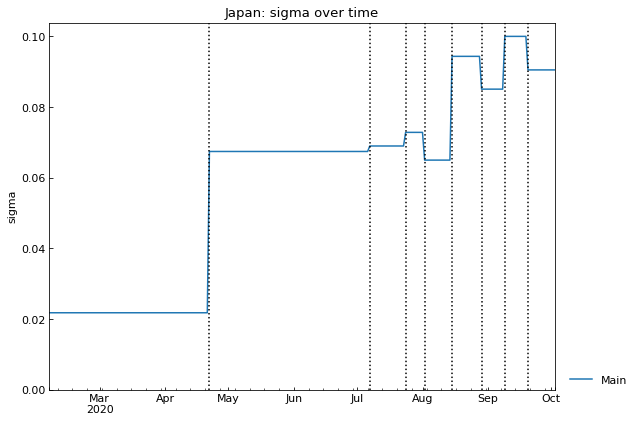

In [34]:
# version >= 2.8.0
_ = scenario.history(target="sigma")

### Show the history of reproduction number

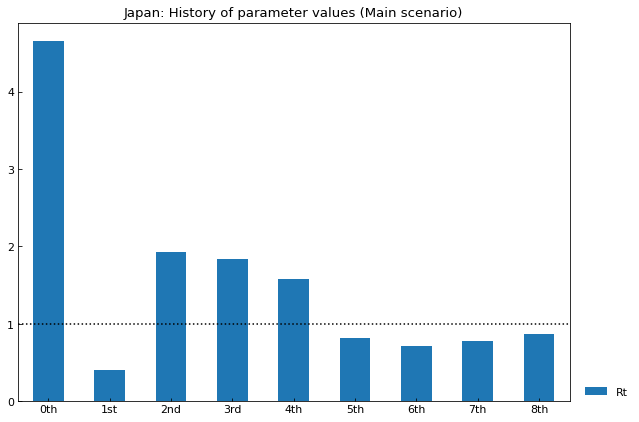

,0th,1st,2nd,3rd,4th,5th,6th,7th,8th
Rt,4.66,0.41,1.93,1.84,1.58,0.82,0.71,0.78,0.87


In [35]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

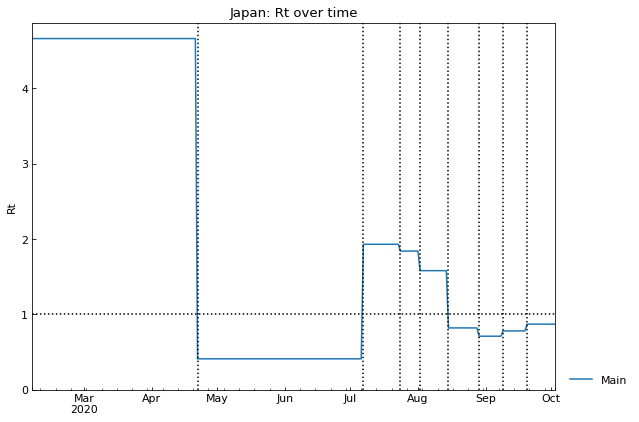

In [36]:
# version >= 2.8.0
_ = scenario.history(target="Rt")

### Simulate the number of cases

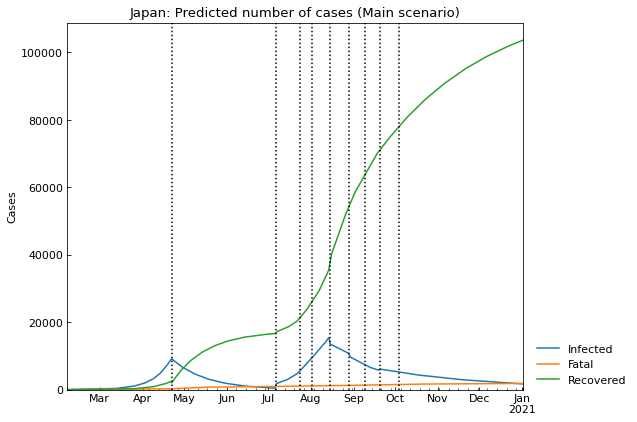

,Date,Confirmed,Fatal,Infected,Recovered
327,2020-12-29,106699,1862,1805,103032
328,2020-12-30,106842,1864,1784,103194
329,2020-12-31,106981,1865,1762,103354
330,2021-01-01,107120,1867,1740,103513
331,2021-01-02,107257,1869,1719,103669


In [37]:
scenario.clear(name="Main")
scenario.add(end_date="01Jan2021", name="Main")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [38]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.09047896237743171

In [39]:
sigma_new = sigma_current * 2
sigma_new

0.18095792475486341

In [40]:
scenario.clear(name="Medicine")
scenario.add(name="Medicine", days=30, sigma=sigma_current)
scenario.add(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     0th      Past  06Feb2020  21Apr2020   126529100  SIR-F  4.66   
         1st      Past  22Apr2020  06Jul2020   126529100  SIR-F  0.41   
         2nd      Past  07Jul2020  23Jul2020   126529100  SIR-F  1.93   
         3rd      Past  24Jul2020  01Aug2020   126529100  SIR-F  1.84   
         4th      Past  02Aug2020  14Aug2020   126529100  SIR-F  1.58   
         5th      Past  15Aug2020  28Aug2020   126529100  SIR-F  0.82   
         6th      Past  29Aug2020  08Sep2020   126529100  SIR-F  0.71   
         7th      Past  09Sep2020  19Sep2020   126529100  SIR-F  0.78   
         8th      Past  20Sep2020  03Oct2020   126529100  SIR-F  0.87   
         9th    Future  04Oct2020  01Jan2021   126529100  SIR-F  0.87   
Medicine 0th      Past  06Feb2020  21Apr2020   126529100  SIR-F  4.66   
         1st      Past  22Apr2020  06Jul2020   126529100  SIR-F  0.41   
         2nd      Past  07Jul2020  23Jul2020   126529100  SIR-F  1.93   
         3rd      Past  24Jul2020  01Aug2020   126529100  SIR-F  1.84   
         4th      Past  02Aug2020  14Aug2020   126529100  SIR-F  1.58   
         5th      Past  15Aug2020  28Aug2020   126529100  SIR-F  0.82   
         6th      Past  29Aug2020  08Sep2020   126529100  SIR-F  0.71   
         7th      Past  09Sep2020  19Sep2020   126529100  SIR-F  0.78   
         8th      Past  20Sep2020  03Oct2020   126529100  SIR-F  0.87   
         9th    Future  04Oct2020  02Nov2020   126529100  SIR-F  0.87   
         10th   Future  03Nov2020  01Jan2021   126529100  SIR-F  0.44   

                   theta     kappa       rho     sigma   tau  1/gamma [day]  \
Scenario Phase                                                                
Main     0th    0.018341  0.000174  0.104200  0.021769  1440             45   
         1st    0.094355  0.000373  0.030364  0.067402  1440             14   
         2nd    0.000466  0.000080  0.133382  0.068954  1440             14   
         3rd    0.000726  0.000120  0.134241  0.072807  1440             13   
         4th    0.000627  0.000316  0.103524  0.064959  1440             15   
         5th    0.000562  0.000900  0.078347  0.094316  1440             10   
         6th    0.020188  0.000164  0.062044  0.085037  1440             11   
         7th    0.002932  0.001325  0.079328  0.099966  1440             10   
         8th    0.000464  0.000984  0.079341  0.090479  1440             11   
         9th    0.000464  0.000984  0.079341  0.090479  1440             11   
Medicine 0th    0.018341  0.000174  0.104200  0.021769  1440             45   
         1st    0.094355  0.000373  0.030364  0.067402  1440             14   
         2nd    0.000466  0.000080  0.133382  0.068954  1440             14   
         3rd    0.000726  0.000120  0.134241  0.072807  1440             13   
         4th    0.000627  0.000316  0.103524  0.064959  1440             15   
         5th    0.000562  0.000900  0.078347  0.094316  1440             10   
         6th    0.020188  0.000164  0.062044  0.085037  1440             11   
         7th    0.002932  0.001325  0.079328  0.099966  1440             10   
         8th    0.000464  0.000984  0.079341  0.090479  1440             11   
         9th    0.000464  0.000984  0.079341  0.090479  1440             11   
         10th   0.000464  0.000984  0.079341  0.180958  1440              5   

                1/alpha2 [day]  alpha1 [-]  1/beta [day]      RMSLE Trials  \
Scenario Phase                                                               
Main     0th              5760       0.018             9   0.937856   1941   
         1st              2681       0.094            32   0.890362   1926   
         2nd             12426       0.000             7  0.0318977    259   
         3rd              8341       0.001             7  0.0192649   1041   
         4th              3163       0.001          

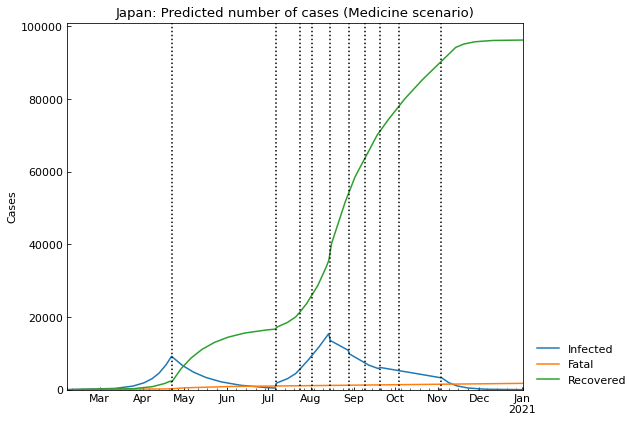

,Date,Confirmed,Fatal,Infected,Recovered
327,2020-12-29,97947,1748,11,96188
328,2020-12-30,97948,1748,10,96190
329,2020-12-31,97950,1749,9,96192
330,2021-01-01,97950,1749,8,96193
331,2021-01-02,97952,1749,8,96195


In [41]:
scenario.simulate(name="Medicine").tail()

### Compare the scenarios

In [42]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 02Jan2021,Fatal on 02Jan2021,10th_Rt
Main,15445,14Aug2020,1719,1869,-
Medicine,15445,14Aug2020,8,1749,0.44


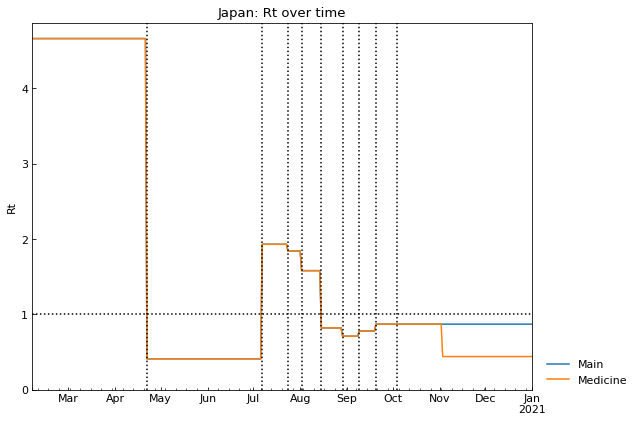

In [43]:
# version >= 2.8.0
_ = scenario.history(target="Rt")

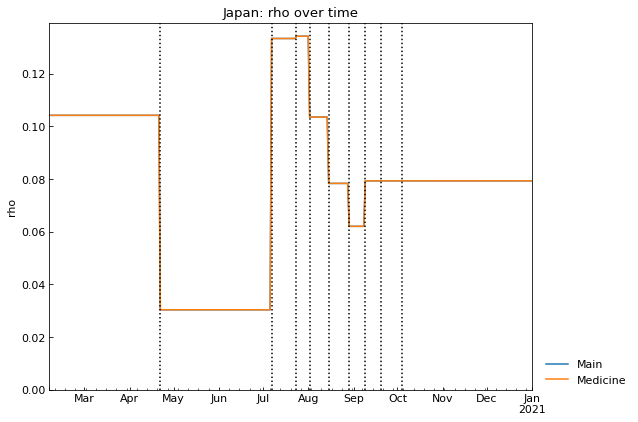

In [44]:
# version >= 2.8.0
_ = scenario.history(target="rho")

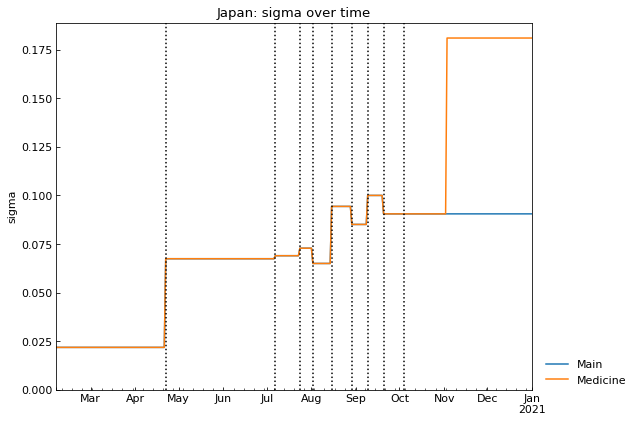

In [45]:
# version >= 2.8.0
_ = scenario.history(target="sigma")

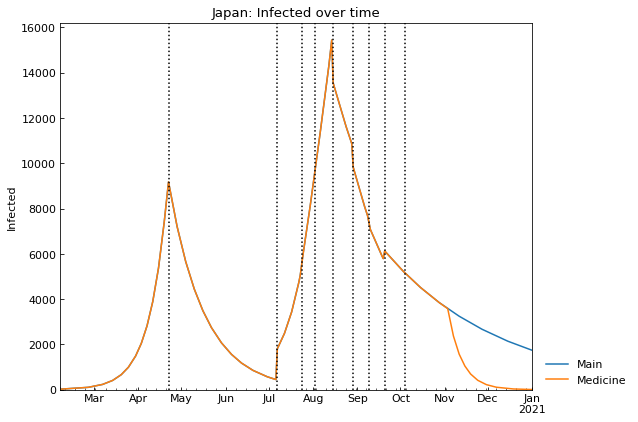

In [46]:
# version >= 2.8.0
_ = scenario.history(target="Infected")